In [1]:
print("Hello There!!")

Hello There!!


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
print("Yo are ready to go")

Yo are ready to go


In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [4]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()


In [5]:
x_scaled = sx.fit_transform(df.drop('price',axis="columns"))


In [6]:
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
y_scaled = sy.fit_transform(df.price.values.reshape(df.shape[0],1))

In [8]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
x_scaled.shape

(20, 2)

In [10]:
w = np.ones(shape=(2))
w

array([1., 1.])

In [11]:
x_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [12]:
def batch_gradient_decent(X,y,epochs,learning_rate=0.01):
    no_of_feature = X.shape[1]
    w = np.ones(shape=(no_of_feature))
    bias = 0
    total_sample = X.shape[0]
    cost_list = []
    epoc_list = []
    for i in range(epochs):
        y_predicted = np.dot(w,X.T) + bias
        
        w_deri = -(2/total_sample)*(X.T.dot(y-y_predicted))
        b_deri = -(2/total_sample)*np.sum(y-y_predicted)
        
        w = w - learning_rate*w_deri
        bias = bias - learning_rate*b_deri
        
        cost = np.mean(np.square(y-y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoc_list.append(i)
            
    return w, bias, cost, cost_list,epoc_list
        

In [13]:
w, bias, cost, cost_list,epoc_list = batch_gradient_decent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),500)

In [14]:
w, bias, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

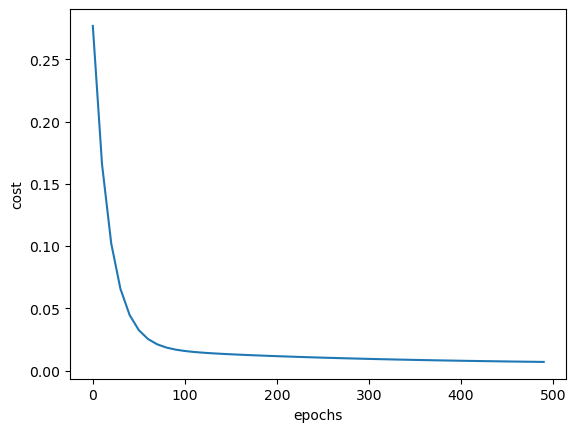

In [15]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoc_list,cost_list)

In [16]:
sx.transform([[2000,3]])

C:\Users\Yashkumar Dubey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.4137931, 0.5      ]])

In [17]:
w[1]

0.6745652664894097

In [20]:
def predict(area,bedroom,w,b):
    scaled_x = sx.transform([[area,bedroom]])
    print(scaled_x)
    scaled_y = w[0]*scaled_x[0][0] + w[1]*scaled_x[0][1] + b
    scaled_y = sy.inverse_transform([[scaled_y]])
    return scaled_y

In [25]:
predict(1000,2,w,bias)

[[0.06896552 0.25      ]]


C:\Users\Yashkumar Dubey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[30.25309446]])

# Stochastic Gradient Decent

In [54]:
def stochastic_gradient_decent(X,y,epochs,learning_rate=0.01):
    import random
    no_of_feature = X.shape[1]
    w = np.ones(shape=(no_of_feature))
    bias = 0
    total_sample = X.shape[0]
    cost_list = []
    epoc_list = []
    for i in range(epochs):
        random_index = random.randint(0,total_sample-1)
        sample_x = X[random_index]
        sample_y = y[random_index]
        y_predicted = np.dot(w,sample_x.T) + bias
        
        w_deri = -(2/total_sample)*(sample_x.T.dot(sample_y-y_predicted))
        b_deri = -(2/total_sample)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate*w_deri
        bias = bias - learning_rate*b_deri
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        if i%100 == 0:
            cost_list.append(cost)
            epoc_list.append(i)
            
    return w, bias, cost, cost_list,epoc_list
        

In [55]:
w, bias, cost, cost_list,epoc_list = stochastic_gradient_decent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),10000)

In [56]:
w,bias,cost

(array([0.70867584, 0.67680052]), -0.22912823677433913, 0.05260490609460072)

In [57]:
def predicts(area,bedroom,w,b):
    scaled_x = sx.transform([[area,bedroom]])
    print(scaled_x)
    scaled_y = w[0]*scaled_x[0][0] + w[1]*scaled_x[0][1] + b
    scaled_y = sy.inverse_transform([[scaled_y]])
    return scaled_y

In [58]:
predicts(1500,2,w,bias)

[[0.24137931 0.25      ]]


C:\Users\Yashkumar Dubey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[47.00276293]])

In [59]:
#So it working preety good out there

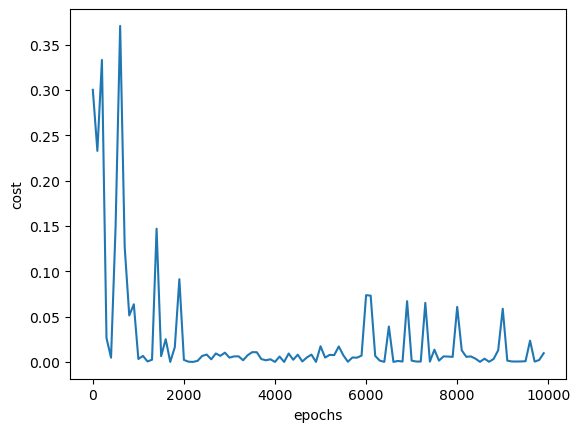

In [60]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoc_list,cost_list)

In [61]:
def mini_gradient_decent(X,y,epochs,learning_rate=0.01):
    import random
    no_of_feature = X.shape[1]
    w = np.ones(shape=(no_of_feature))
    bias = 0
    total_sample = X.shape[0]
    cost_list = []
    epoc_list = []
    for i in range(epochs):
        random_index = random.randint(0,total_sample-1)
        sample_x = X[random_index:random_index+20]
        sample_y = y[random_index:random_index+20]
        y_predicted = np.dot(w,sample_x.T) + bias
        
        w_deri = -(2/total_sample)*(sample_x.T.dot(sample_y-y_predicted))
        b_deri = -(2/total_sample)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate*w_deri
        bias = bias - learning_rate*b_deri
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        if i%100 == 0:
            cost_list.append(cost)
            epoc_list.append(i)
            
    return w, bias, cost, cost_list,epoc_list
        

In [62]:
w, bias, cost, cost_list,epoc_list = mini_gradient_decent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),10000)

In [63]:
w

array([0.77319067, 0.34888038])

In [64]:
bias

-0.09555681735850438

In [65]:
cost

0.00707293620219106

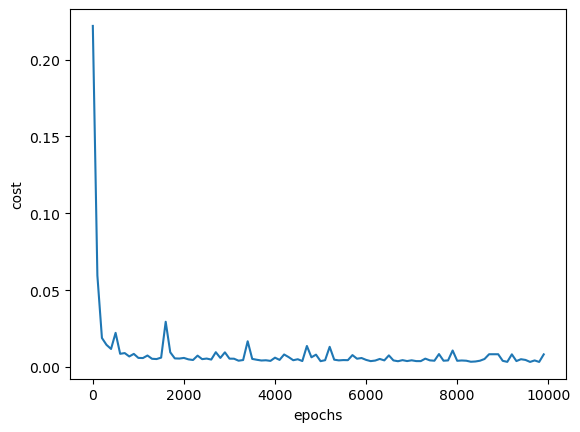

In [66]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoc_list,cost_list)

In [67]:
def predictm(area,bedroom,w,b):
    scaled_x = sx.transform([[area,bedroom]])
    print(scaled_x)
    scaled_y = w[0]*scaled_x[0][0] + w[1]*scaled_x[0][1] + b
    scaled_y = sy.inverse_transform([[scaled_y]])
    return scaled_y

In [68]:
predicts(1500,2,w,bias)

[[0.24137931 0.25      ]]


C:\Users\Yashkumar Dubey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[56.06989372]])